In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/hamber.csv')
df.sample(5)

,Category,Message
5064,ham,Ok i also wan 2 watch e 9 pm show...
2489,ham,Aiyah e rain like quite big leh. If drizzling ...
684,spam,Hi I'm sue. I am 20 years old and work as a la...
2523,ham,Dunno lei... I might b eatin wif my frens... I...
3009,spam,"Loan for any purpose £500 - £75,000. Homeowner..."


In [2]:
df.shape

(5572, 2)

In [3]:
## Data Cleaning 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.rename(columns={'Category':'target','Message':'text'},inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 

In [7]:
df['target'] = encoder.fit_transform(df['target'])

In [8]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(415)

In [11]:
df = df.drop_duplicates(keep='first')


In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.duplicated().sum()

np.int64(0)

## EDA

In [14]:
df['target'].value_counts()

target
0    4516
1     641
Name: count, dtype: int64

In [15]:
import matplotlib.pyplot as plt

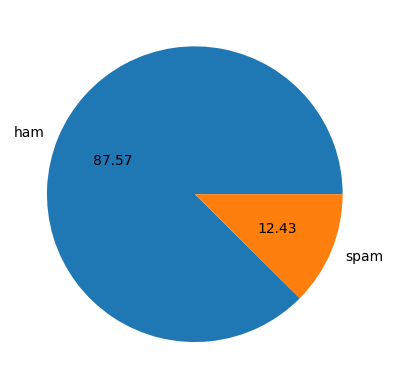

In [16]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
import nltk

In [18]:
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pratham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Pratham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
df['num_charachters'] = df['text'].apply(len)

In [20]:
df.head()

,target,text,num_charachters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
## Num of words 
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head() 

,target,text,num_charachters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentance'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_charachters,num_words,num_sentance
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df.describe()

,target,num_charachters,num_words,num_sentance
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750
std,0.329952,58.382922,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [25]:
### ham
df[df['target']==0][['num_charachters','num_words','num_sentance']].describe()

,num_charachters,num_words,num_sentance
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
### spam
df[df['target']==1][['num_charachters','num_words','num_sentance']].describe()

,num_charachters,num_words,num_sentance
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_charachters', ylabel='Count'>

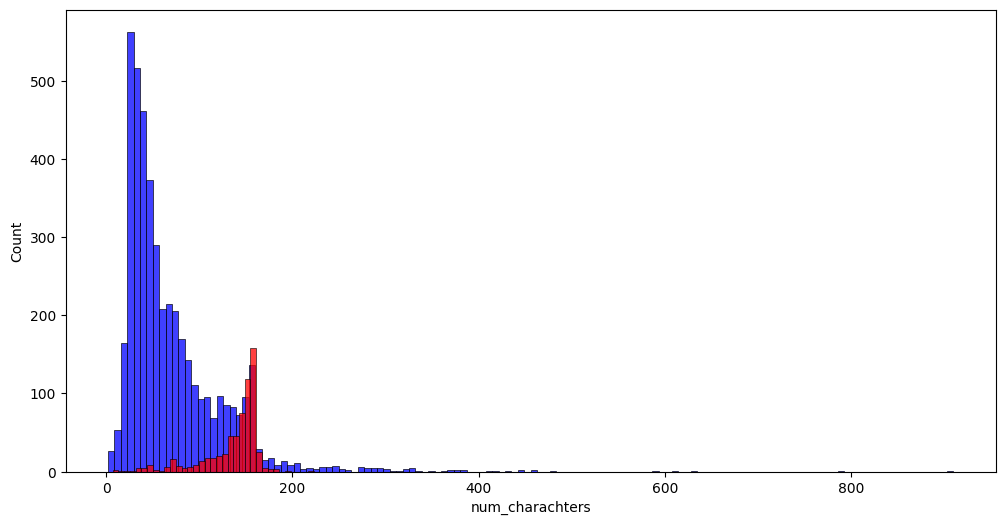

In [27]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_charachters'], color = 'blue')
sns.histplot(df[df['target']==1]['num_charachters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

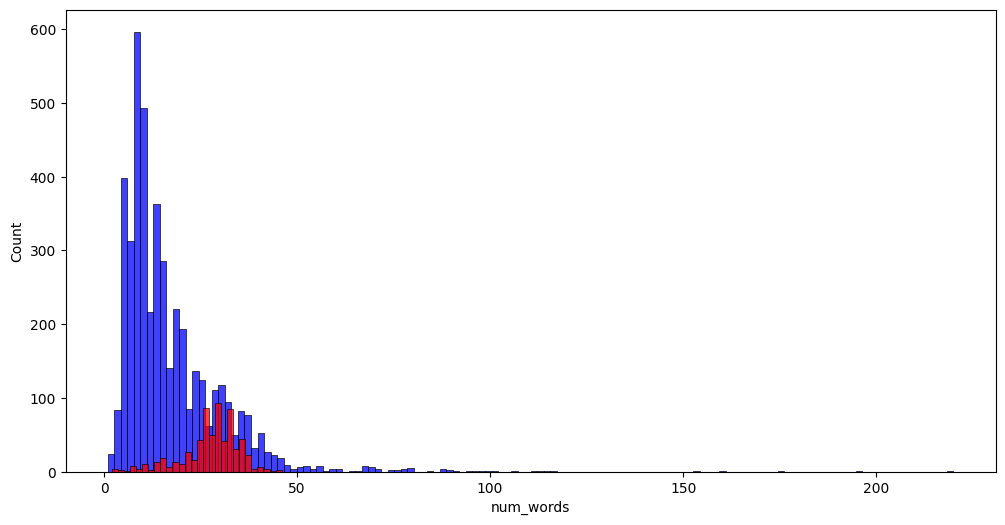

In [28]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'], color = 'blue')
sns.histplot(df[df['target']==1]['num_words'], color = 'red')

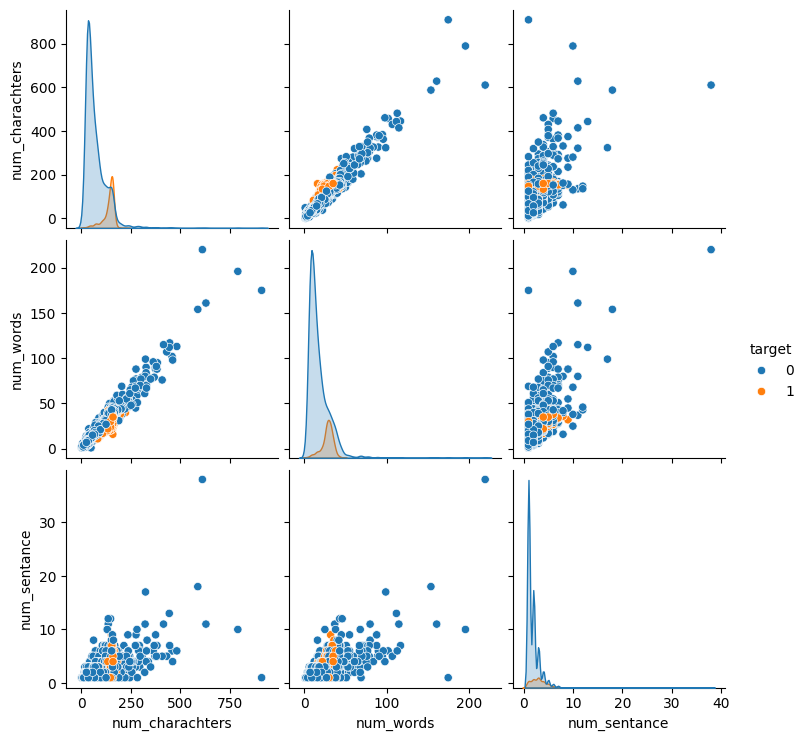

In [29]:
sns.pairplot(df,hue='target')

In [30]:
df.sample(5)

,target,text,num_charachters,num_words,num_sentance
4360,0,Ü only send me the contents page...,35,8,1
5081,0,"Keep ur problems in ur heart, b'coz nobody wil...",350,77,3
1293,0,Da my birthdate in certificate is in april but...,174,38,4
792,0,All e best 4 ur driving tmr :-),31,10,1
536,0,"Good afternoon, my love! How goes that day ? I...",160,38,4


<Axes: >

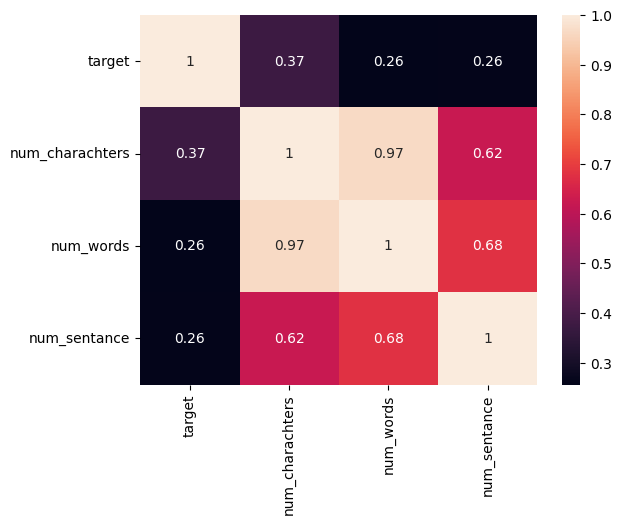

In [31]:
sns.heatmap(df.drop(columns=['text']).corr(), annot=True)


In [32]:
## Preprocessing the text data
### Lower case
### Tokenization
### Removing special characters
### Removing stop words and punctuation
### Stemming/Lemmatization

In [33]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import string

ps = PorterStemmer()
sw = set(stopwords.words('english'))
pu = set(string.punctuation)

def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)

    # keep only alphanumeric
    tokens = [t for t in tokens if t.isalnum()]

    # remove stopwords
    tokens = [t for t in tokens if t not in sw]

    # stem words
    tokens = [ps.stem(t) for t in tokens]

    return " ".join(tokens)


In [34]:
transform_text("Hello World! Sample text for preprocessing.")

'hello world sampl text preprocess'

In [35]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [36]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [37]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_charachters,num_words,num_sentance,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

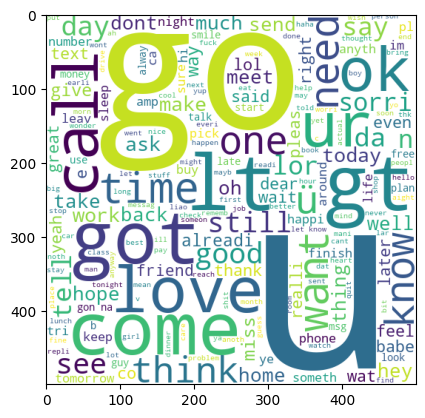

In [39]:
plt.figsize=(15,6)
plt.imshow(wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" ")))

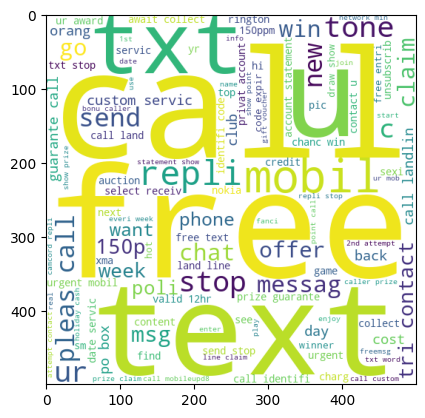

In [40]:
plt.figsize=(15,6)
plt.imshow(wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" ")))

In [41]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [42]:
len(spam_corpus)

9781

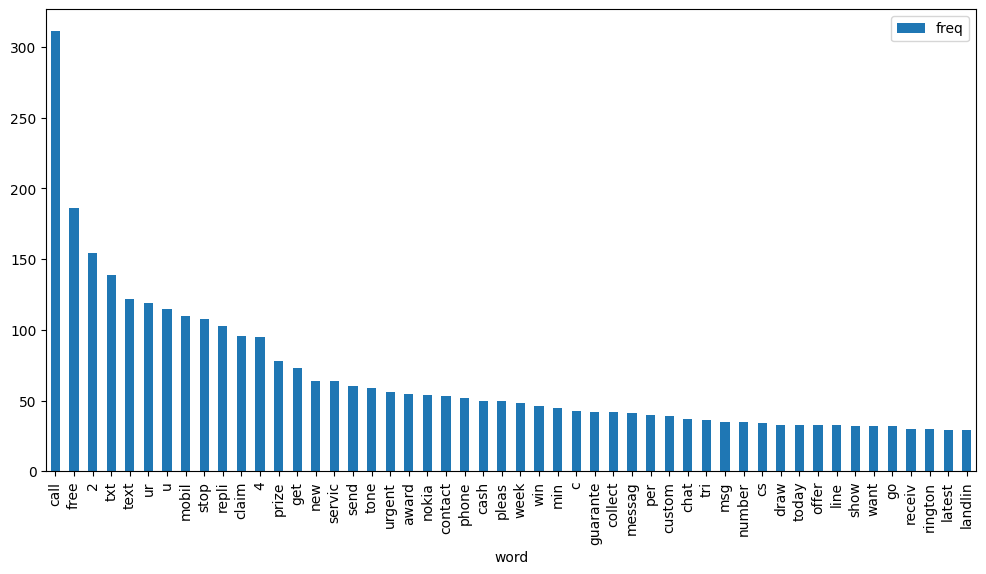

In [43]:
from collections import Counter
word_freq = pd.DataFrame(Counter(spam_corpus).most_common(50), columns=['word', 'freq'])
plt.show(word_freq.plot.bar(x='word', y='freq', figsize=(12,6)))

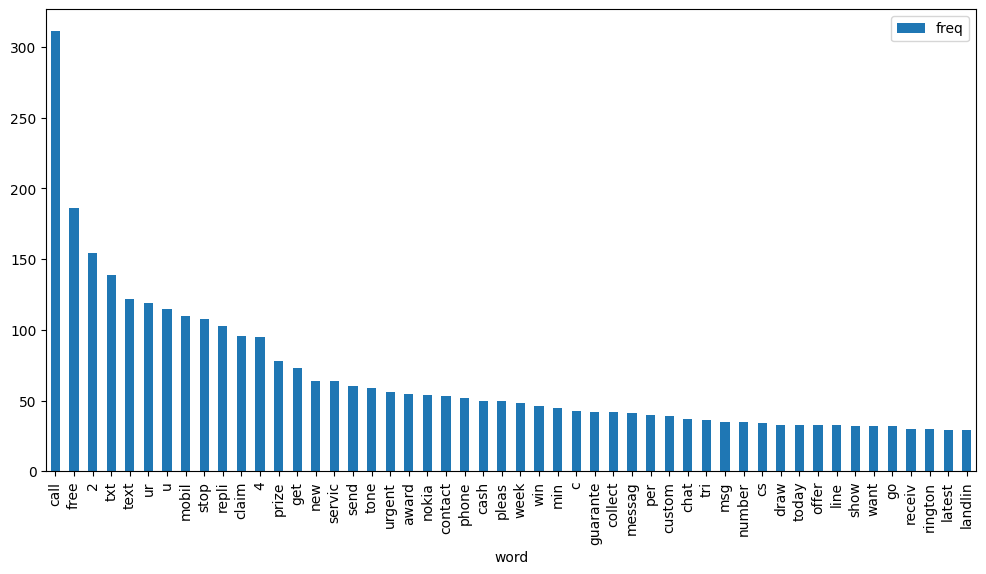

In [44]:
from collections import Counter
word_freq = pd.DataFrame(Counter(spam_corpus).most_common(50), columns=['word', 'freq'])
plt.show(word_freq.plot.bar(x='word', y='freq', figsize=(12,6)))

In [45]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

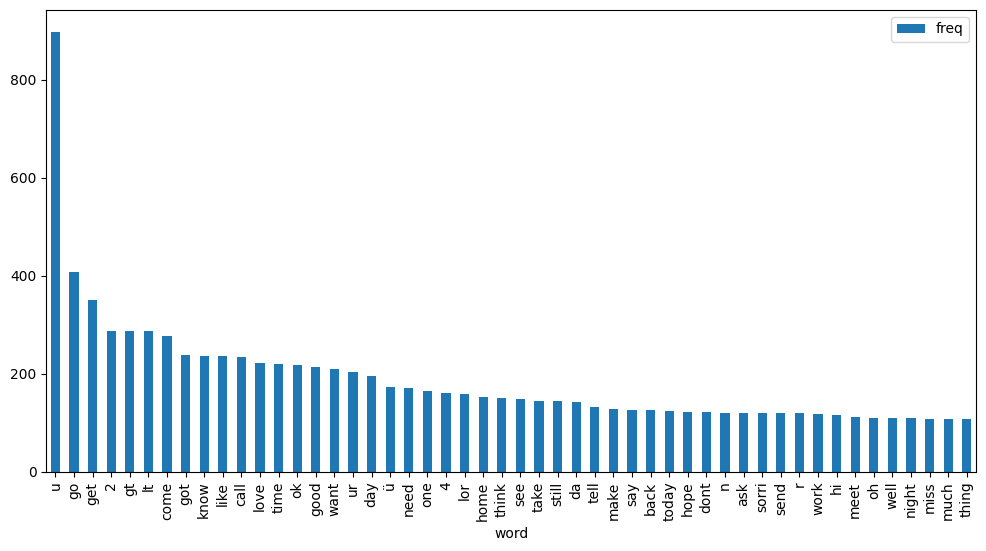

In [46]:
from collections import Counter
word_freq = pd.DataFrame(Counter(ham_corpus).most_common(50), columns=['word', 'freq'])
plt.show(word_freq.plot.bar(x='word', y='freq', figsize=(12,6)))

In [47]:
## Model Building

In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [49]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [50]:
X.shape

(5157, 3000)

In [51]:
y = df['target'].values

In [52]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5157,))

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [56]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
accuracy_score(y_test, y_pred1)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[786 119]
 [ 18 109]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       905
           1       0.48      0.86      0.61       127

    accuracy                           0.87      1032
   macro avg       0.73      0.86      0.77      1032
weighted avg       0.92      0.87      0.88      1032



In [57]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
accuracy_score(y_test, y_pred2)
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[905   0]
 [ 29  98]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       905
           1       1.00      0.77      0.87       127

    accuracy                           0.97      1032
   macro avg       0.98      0.89      0.93      1032
weighted avg       0.97      0.97      0.97      1032



In [58]:
bnb.fit(X_train, y_train)
y_pred2 = bnb.predict(X_test)
accuracy_score(y_test, y_pred2)
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[903   2]
 [ 16 111]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       905
           1       0.98      0.87      0.93       127

    accuracy                           0.98      1032
   macro avg       0.98      0.94      0.96      1032
weighted avg       0.98      0.98      0.98      1032



In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB   


In [60]:
lr = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier()
bnb = BernoulliNB()
mnb = MultinomialNB()
models = {
    'Logistic Regression': lr,
    'Support Vector Machine': svc,
    'Decision Tree': dtc,
    'Random Forest': rfc,
    'K-Nearest Neighbors': knn,
    'Gradient Boosting': gbc,
    'AdaBoost': abc,
    'Extra Trees': etc,
    'Bernoulli Naive Bayes': bnb,
    'Multinomial Naive Bayes': mnb
}

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        results[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "confusion": confusion
        }
        print(f"{name} Accuracy: {accuracy:.4f}, Precision: {precision:.4f}")
    return results


In [62]:
solutions = train_and_evaluate(models, X_train, y_train, X_test, y_test)
df_solutions = pd.DataFrame(solutions).T

Logistic Regression Accuracy: 0.9593, Precision: 0.9670
Support Vector Machine Accuracy: 0.9738, Precision: 1.0000
Decision Tree Accuracy: 0.9457, Precision: 0.7934
Random Forest Accuracy: 0.9729, Precision: 1.0000
K-Nearest Neighbors Accuracy: 0.9128, Precision: 1.0000
Gradient Boosting Accuracy: 0.9593, Precision: 0.9775
AdaBoost Accuracy: 0.9302, Precision: 0.8667
Extra Trees Accuracy: 0.9787, Precision: 0.9907
Bernoulli Naive Bayes Accuracy: 0.9826, Precision: 0.9823
Multinomial Naive Bayes Accuracy: 0.9719, Precision: 1.0000


In [63]:
df_solutions.drop(columns=['confusion'], inplace=True)
print(df_solutions)

                         accuracy precision    recall        f1
Logistic Regression      0.959302  0.967033  0.692913  0.807339
Support Vector Machine   0.973837       1.0  0.787402  0.881057
Decision Tree            0.945736  0.793388  0.755906  0.774194
Random Forest            0.972868       1.0  0.779528  0.876106
K-Nearest Neighbors      0.912791       1.0  0.291339   0.45122
Gradient Boosting        0.959302  0.977528  0.685039  0.805556
AdaBoost                 0.930233  0.866667  0.511811  0.643564
Extra Trees              0.978682  0.990654  0.834646  0.905983
Bernoulli Naive Bayes    0.982558  0.982301  0.874016     0.925
Multinomial Naive Bayes  0.971899       1.0  0.771654  0.871111


In [65]:
from sklearn.ensemble import StackingClassifier

stacking = StackingClassifier(
    estimators=[
        ('nb', BernoulliNB()),
        ('svm', SVC(probability=True)),
        ('etc', ExtraTreesClassifier())
    ],
    final_estimator=RandomForestClassifier()
)

stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)



In [ ]:
print("stacking Accuracy:", accuracy_score(y_test, y_pred))
print("stacking precision:", precision_score(y_test, y_pred))
print("stacking recall:", recall_score(y_test, y_pred))

stacking Accuracy: 0.9825581395348837
stacking precision: 0.9823008849557522
stacking recall: 0.8740157480314961


In [66]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(bnb, open('model.pkl', 'wb'))